El objetivo de este notebook no es otro que el de leer las imagenes almacenadas en el directorio 'datasets_imagenes', y preparar sus datos para entrenar el modelo de Clasificacion.



In [1]:
# Antes de continuar, debo importar una serie de librerias a utilizar
# para la manipulacion de las imagenes

import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Creacion de conjuntos de entrenamiento y prueba.

Ahora mismo, dispongo de las imagenes en los directorios pertinentes.

Para poder alimentar al modelo con las imagenes, es necesario cargarlas en memoria como matrices de Numpy, y generar tambien las etiquetas de las imagenes.

In [2]:
total = 0

for carpeta in os.listdir('datasets_animales/'):
    
    total += len(os.listdir(os.path.join('datasets_animales/', carpeta)))
    
else:
    print('Existen un total de {} imagenes.'.format(total))

Existen un total de 26179 imagenes.


In [3]:
# Para empezar, debo crear tantos arrays como tipos de animales que tratamos de
# clasificar.

# Una vez cree cada uno de estos arrays, debere crear un array mayor que
# contenga estos mas pequenios, concatenados unos con otros.

directorio_imagenes = 'datasets_animales/'

X = []

for carpeta in tqdm(os.listdir(directorio_imagenes)):
    arrayAnimal = []  # Lista vacía a la que añadiré los datos cargados de cada imagen
    
    for imagen in os.listdir(os.path.join(directorio_imagenes, carpeta)):
        rutaImagen = os.path.join(directorio_imagenes, carpeta, imagen)
        imagenCargada = cv2.imread(rutaImagen, cv2.IMREAD_GRAYSCALE)
        
        try:
            arrayAnimal.append(imagenCargada)
        except Exception as e:
            print('Ha ocurrido un error al tratar de cargar la imagen {} ==> '.format(imagen), e)
        
    else:
        X.append(arrayAnimal)

# Concatenar las listas en un solo array de NumPy usando np.vstack
X = np.vstack([np.array(item) for item in X])

print('El conjunto de características se ha creado correctamente como un array de NumPy.')

100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


El conjunto de características se ha creado correctamente como un array de NumPy.


In [4]:
X.shape

(26179, 160, 120)

In [5]:
# Ahora que tengo agrupadas las caracteristicas de las imagenes, debo crear un array que contenga las etiquetas para cada una de estas imagenes.
# Esto lo lograre de la siguiente manera:

# Creo un diccionario que mapee los diferentes animales para los que tenemos imagenes, con su correspondiente etiqueta.

contador = 0

dictAnimales = {}

for carpeta in os.listdir('datasets_animales/'):
    
    dictAnimales[carpeta] = contador, len(os.listdir(os.path.join('datasets_animales/', carpeta)))
    print('Animal {} ==> Etiqueta {}'.format(carpeta, contador))
    
    contador +=1
    
print('Se ha creado el diccionario "dictAnimales" correctamente.')

Animal butterfly ==> Etiqueta 0
Animal cat ==> Etiqueta 1
Animal chicken ==> Etiqueta 2
Animal cow ==> Etiqueta 3
Animal dog ==> Etiqueta 4
Animal elephant ==> Etiqueta 5
Animal horse ==> Etiqueta 6
Animal ragno ==> Etiqueta 7
Animal sheep ==> Etiqueta 8
Animal squirrel ==> Etiqueta 9
Se ha creado el diccionario "dictAnimales" correctamente.


In [6]:
# A continuacion, creo un array que contenga el numero de la etiqueta para cada animal, repetido tantas veces como imagenes tengo de cada animal

for clave, valor in dictAnimales.items():
    print('Animal {} ==> {} ejemplos'.format(clave, valor[-1]))

Animal butterfly ==> 2112 ejemplos
Animal cat ==> 1668 ejemplos
Animal chicken ==> 3098 ejemplos
Animal cow ==> 1866 ejemplos
Animal dog ==> 4863 ejemplos
Animal elephant ==> 1446 ejemplos
Animal horse ==> 2623 ejemplos
Animal ragno ==> 4821 ejemplos
Animal sheep ==> 1820 ejemplos
Animal squirrel ==> 1862 ejemplos


In [7]:
y = []

for clave, valor in dictAnimales.items():
    etiqueta = valor[0]
    num_ejemplos = valor[1]
    
    # Utilizar np.tile para replicar la etiqueta num_ejemplos veces
    etiquetasAnimal = np.tile(etiqueta, num_ejemplos)
    print(etiquetasAnimal)
    print(len(etiquetasAnimal))
    
    # Añadir las etiquetas al array y
    y.extend(etiquetasAnimal)

# Convertir y a un array de NumPy y redimensionarlo a (-1, 1)
y = np.array(y).astype('float32').reshape((-1, 1))


print('Conjunto de etiquetas (y) creado correctamente.')

[0 0 0 ... 0 0 0]
2112
[1 1 1 ... 1 1 1]
1668
[2 2 2 ... 2 2 2]
3098
[3 3 3 ... 3 3 3]
1866
[4 4 4 ... 4 4 4]
4863
[5 5 5 ... 5 5 5]
1446
[6 6 6 ... 6 6 6]
2623
[7 7 7 ... 7 7 7]
4821
[8 8 8 ... 8 8 8]
1820
[9 9 9 ... 9 9 9]
1862
Conjunto de etiquetas (y) creado correctamente.


In [10]:
y.shape

(26179, 1)

In [11]:
X

array([[[129, 130, 131, ..., 136, 135, 135],
        [129, 130, 131, ..., 138, 138, 139],
        [130, 131, 132, ..., 139, 140, 141],
        ...,
        [106, 109, 112, ..., 142, 140, 138],
        [108, 110, 112, ..., 143, 142, 139],
        [108, 109, 111, ..., 144, 143, 140]],

       [[125, 124, 123, ..., 133, 133, 133],
        [124, 124, 123, ..., 134, 133, 133],
        [124, 123, 123, ..., 134, 134, 133],
        ...,
        [133, 133, 133, ..., 139, 139, 139],
        [133, 133, 133, ..., 139, 139, 139],
        [133, 133, 133, ..., 139, 139, 139]],

       [[171, 166, 166, ..., 194, 197, 198],
        [166, 170, 160, ..., 194, 197, 198],
        [162, 163, 167, ..., 194, 195, 197],
        ...,
        [202, 202, 201, ..., 166, 165, 164],
        [202, 202, 201, ..., 167, 166, 165],
        [201, 202, 202, ..., 168, 167, 166]],

       ...,

       [[113, 106, 107, ..., 233, 235, 224],
        [109, 104,  91, ..., 234, 230, 217],
        [100,  99,  95, ..., 237, 236, 224

In [12]:
# Los valores de los pixeles para cada imagen del array X pueden contener valor entre 1 y 255 (negro-blanco).
# Es conveniente normalizar estos valores, para facilitar el trabajo de aprendizaje del modelo.

try:
    X = np.array(X).astype('float32') / 255
    print('Los datos de las imagenes han sido normalizados con exito.')
    
except Exception as e:
    print('Ha ocurrido un error al tratar de normalizar los datos de las imagenes.')

Los datos de las imagenes han sido normalizados con exito.


In [13]:
# Muestro el array X, ahora con su contenido normalizado.
X

array([[[0.5058824 , 0.50980395, 0.5137255 , ..., 0.53333336,
         0.5294118 , 0.5294118 ],
        [0.5058824 , 0.50980395, 0.5137255 , ..., 0.5411765 ,
         0.5411765 , 0.54509807],
        [0.50980395, 0.5137255 , 0.5176471 , ..., 0.54509807,
         0.54901963, 0.5529412 ],
        ...,
        [0.41568628, 0.42745098, 0.4392157 , ..., 0.5568628 ,
         0.54901963, 0.5411765 ],
        [0.42352942, 0.43137255, 0.4392157 , ..., 0.56078434,
         0.5568628 , 0.54509807],
        [0.42352942, 0.42745098, 0.43529412, ..., 0.5647059 ,
         0.56078434, 0.54901963]],

       [[0.49019608, 0.4862745 , 0.48235294, ..., 0.52156866,
         0.52156866, 0.52156866],
        [0.4862745 , 0.4862745 , 0.48235294, ..., 0.5254902 ,
         0.52156866, 0.52156866],
        [0.4862745 , 0.48235294, 0.48235294, ..., 0.5254902 ,
         0.5254902 , 0.52156866],
        ...,
        [0.52156866, 0.52156866, 0.52156866, ..., 0.54509807,
         0.54509807, 0.54509807],
        [0.5

In [14]:
# Antes de continuar, voy a importar el recolector de basura de Python, para poder liberar tanta memoria como sea posible, pues empezamos a trabajar con
# bastantes datos en memoria.

import gc
gc.collect()

0

In [15]:
# A continuacion, voy a hacer uso de la libreria sklearn para crear los conjuntos de entrenamiento, prueba y validacion.
# RECORDATORIO ==> importante instalar las dependencias del archivo 'requeriments.txt'.

from sklearn.model_selection import train_test_split


# División para el conjunto de prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Elimino las variables X e y, puesto que ya no van a hacer falta, y permitiran liberar memoria
del X
del y
gc.collect()

# División para el conjunto de entrenamiento y validación (80% del conjunto original)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)


gc.collect()

0

In [16]:
del X_temp
del y_temp

In [17]:
X_train.shape

(17801, 160, 120)

In [18]:
y_train.shape

(17801, 1)

In [19]:
X_test.shape

(5236, 160, 120)

In [20]:
y_test.shape

(5236, 1)

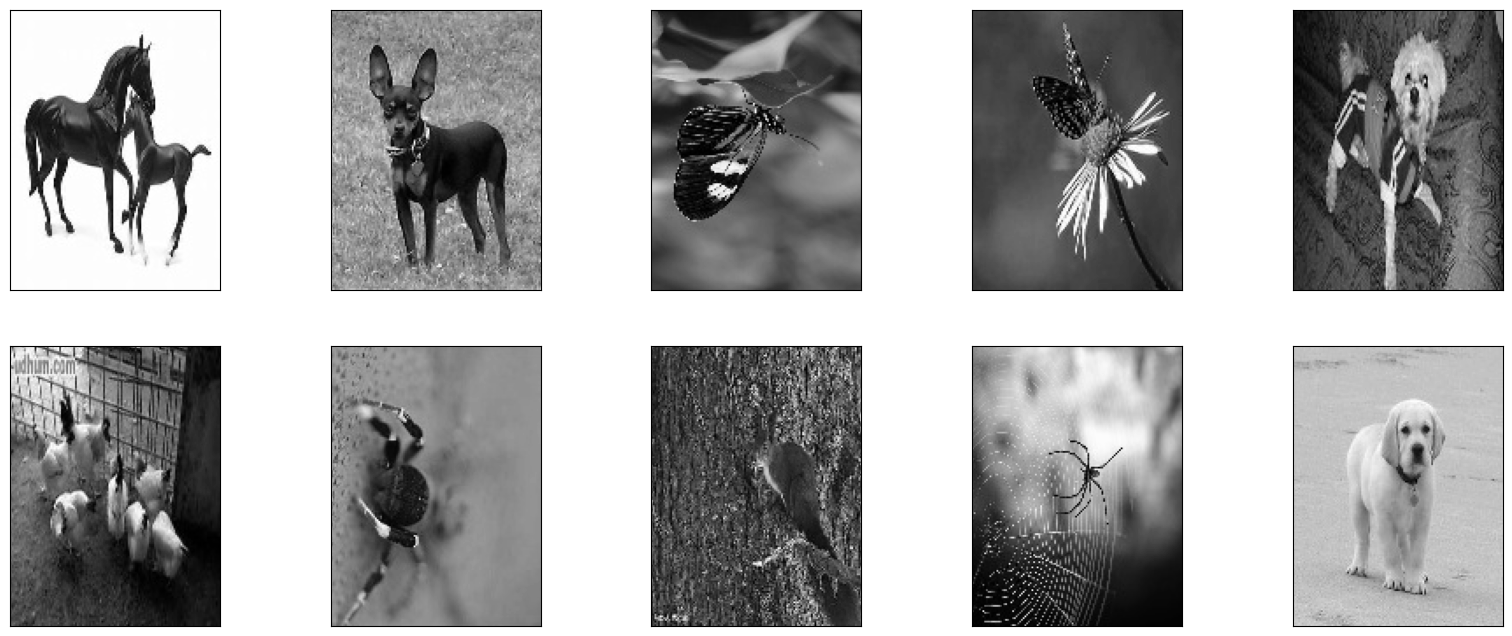

In [21]:
# Mostramos un grupo de 10 imágenes del conjunto de entrenamiento
plt.figure(figsize = (20, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = 'gray')

In [22]:
y_train[:10]

array([[6.],
       [4.],
       [0.],
       [0.],
       [4.],
       [2.],
       [7.],
       [9.],
       [7.],
       [4.]], dtype=float32)

# 2. Creacion del modelo de Clasificacion

Para este proyecto, voy a entrenar una red neuronal convolucional, con el objetivo de que aprenda a clasificar imagenes de animales.


In [32]:
del modeloCNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras import models, layers

# Definir el modelo
modeloCNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 120, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(10, activation='softmax')  # 10 neuronas para 10 tipos de etiquetas, softmax para clasificación multiclase
])

# Compilar el modelo con el optimizador Adam y sparse_categorical_crossentropy como función de pérdida
modeloCNN.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [34]:
# Muestro un resumen de la arquitectura de la red neuronal.

modeloCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 118, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 79, 59, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 28, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 38, 28, 64)       

# 3. Entrenamiento de la red convolucional

In [35]:
import tensorflow as tf

# Obtener una lista de las GPUs disponibles
gpus = tf.config.experimental.list_physical_devices('GPU')

# Si tienes varias GPUs, puedes seleccionar cuál usar
if gpus:
    try:
        # Solo utilizar la primera GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU física(s),", len(logical_gpus), "GPU lógica(s)")
    except RuntimeError as e:
        print(e)


1 GPU física(s), 1 GPU lógica(s)


In [36]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [37]:
gc.collect()

# Entrenar el modelo en GPU
with tf.device('/GPU:0'):  # Esto asegura que el modelo se entrena en la GPU 0 si tienes varias GPU
    
    #X = tf.convert_to_tensor(X_train, np.float32)
    #y = tf.convert_to_tensor(y_train, np.float32)

    historia = modeloCNN.fit(
        X_train, y_train,
        epochs=7,
        batch_size=20,
        validation_data=(X_val, y_val)
    )


Epoch 1/7
891/891 [==============================] - 6s 7ms/step - loss: 1.8713 - accuracy: 0.3511 - val_loss: 1.5807 - val_accuracy: 0.4739
Epoch 2/7
891/891 [==============================] - 6s 7ms/step - loss: 1.4575 - accuracy: 0.5086 - val_loss: 1.3614 - val_accuracy: 0.5420
Epoch 3/7
891/891 [==============================] - 6s 7ms/step - loss: 1.2083 - accuracy: 0.5991 - val_loss: 1.3130 - val_accuracy: 0.5672
Epoch 4/7
891/891 [==============================] - 6s 7ms/step - loss: 1.0366 - accuracy: 0.6569 - val_loss: 1.2137 - val_accuracy: 0.5987
Epoch 5/7
891/891 [==============================] - 6s 7ms/step - loss: 0.8849 - accuracy: 0.7047 - val_loss: 1.2225 - val_accuracy: 0.6088
Epoch 6/7
891/891 [==============================] - 6s 7ms/step - loss: 0.7703 - accuracy: 0.7395 - val_loss: 1.2860 - val_accuracy: 0.5933
Epoch 7/7
891/891 [==============================] - 6s 7ms/step - loss: 0.6653 - accuracy: 0.7719 - val_loss: 1.3127 - val_accuracy: 0.6165


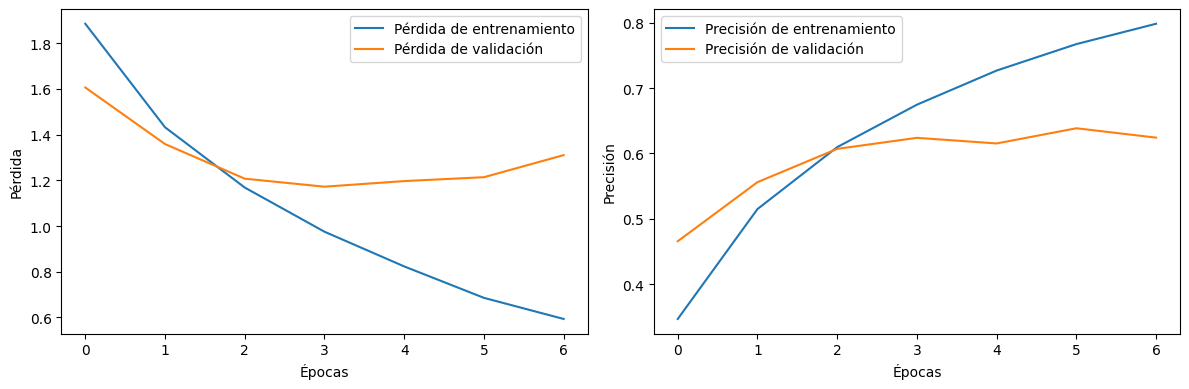

In [28]:
import matplotlib.pyplot as plt

# Obtener las métricas de pérdida y precisión del historial de entrenamiento
pérdida = historia.history['loss']
precisión = historia.history['accuracy']
val_pérdida = historia.history['val_loss']
val_precisión = historia.history['val_accuracy']

# Crear gráficos para la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(pérdida, label='Pérdida de entrenamiento')
plt.plot(val_pérdida, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Crear gráficos para la precisión
plt.subplot(1, 2, 2)
plt.plot(precisión, label='Precisión de entrenamiento')
plt.plot(val_precisión, label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


# 4. Evalucion del modelo entrenado

In [31]:
test_loss, test_accuracy = modeloCNN.evaluate(X_test, y_test)
print("Precisión del conjunto de prueba ==> ", test_accuracy)
print("Pérdida del conjunto de prueba ==>", test_loss)

164/164 [==============================] - 1s 3ms/step - loss: 2.2704 - accuracy: 0.6071
Precisión del conjunto de prueba ==>  0.6071428656578064
Pérdida del conjunto de prueba ==> 2.2703933715820312


In [ ]:
carpetaPrueba = 'imagenes_prueba/'
class_names = list(item for item in range(0,10))
imagenesPrueba = []

for imagen_nombre in os.listdir(carpetaPrueba):
    # Construir la ruta completa de la imagen
    imagen_ruta = os.path.join(carpetaPrueba, imagen_nombre)

    # Cargar la imagen en escala de grises y redimensionarla
    img = cv2.imread(imagen_ruta, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (120, 160))

    # Expandir las dimensiones de la imagen para que coincidan con las expectativas del modelo
    img = np.expand_dims(img, axis=-1)

    img = img / 255
    imagenesPrueba.append(img)

imagenesPrueba = np.array(imagenesPrueba)

# Realizar predicciones y mostrar los resultados
for imagen in imagenesPrueba:
    # Se lanzan las imágenes contra el modelo para obtener las detecciones.
    predictions = modeloCNN.predict(np.expand_dims(imagen, axis=0))

    # Obtiene la clase predicha (la clase con la probabilidad más alta)
    clase_predicha = np.argmax(predictions, axis=1)

    # Obtiene la probabilidad de la clase predicha
    probabilidad_predicha = predictions[0][clase_predicha]

    # Muestra la clase predicha y su probabilidad
    print(f"Clase predicha: {class_names[clase_predicha[0]]}")

    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[:, :, 0], cmap='gray')

    # Muestra la clase predicha en el gráfico
    plt.xlabel(f"Clase predicha: {class_names[clase_predicha[0]]}")

    plt.show()


In [ ]:
# En este caso, el modelo ha clasificado correctamente las 4 imagenes.
# Voy a comprobar el rendimiento del modelo representando los resultados
# en un cuadro de clasificacion y en una confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

# Reshape de las imágenes en X_test
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 160, 120, 1))

# Obtén las predicciones del modelo en el conjunto de prueba
predicciones = modeloCNN.predict(X_test_reshaped)

# Convierte las predicciones de las probabilidades a clases
y_pred = np.argmax(predicciones, axis=1)

# Imprime el classification report
print(classification_report(y_test, y_pred))

# Imprime la confusion matrix
print(confusion_matrix(y_test, y_pred))





In [ ]:
arquitectura_modelo = modeloCNN.to_json()
with open('modeloCNN_entrenado.json', 'w') as json_file:
    json_file.write(arquitectura_modelo)

modeloCNN.save_weights('modeloCNN_entrenado.h5')